In [72]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import decomposition
import mglearn
import collections
import matplotlib.pyplot as plt
import random

In [73]:
#데이터 표준화 함수
def standardization(Data):
    Input = ((Data[['age', 'anaemia','creatinine_phosphokinase', 'diabetes','ejection_fraction','high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium','smoking','time']] - np.mean(Data[['age', 'anaemia','creatinine_phosphokinase', 'diabetes','ejection_fraction','high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium','smoking','time']], axis=0)) / np.std(Data[['age', 'anaemia','creatinine_phosphokinase', 'diabetes','ejection_fraction','high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium','smoking','time']], axis=0))
    return(pd.concat([Input, Data['DEATH_EVENT']], axis=1))

# 데이터 로드 및 정규화
WellSeparated = MinMaxScaler().fit_transform(pd.read_csv('C:/JHY/heart_failure_clinical_records_dataset.csv'))


# 데이터 표준화  
ws = pd.DataFrame(WellSeparated)
ws.columns = ['age', 'anaemia','creatinine_phosphokinase', 'diabetes','ejection_fraction','high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium','smoking','time', 'DEATH_EVENT']
wells = standardization(ws)
Artificial_Dataset={'Heart_disease':wells}
Artificial_Dataset2= pd.DataFrame(data = wells)

#features
datax = Artificial_Dataset2.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]

# 타겟 데이터
D = pd.DataFrame(Artificial_Dataset2.DEATH_EVENT)

# 차원 축소(2차원)
pca = decomposition.PCA(n_components =2)
sklearn_pca_x = pca.fit_transform(datax)
sklearn_result = pd.DataFrame(sklearn_pca_x)
sklearn_result
sklearn_result.columns = ['X','Y']
fd = pd.concat([sklearn_result, D], axis = 1)
fd.columns = ['X', 'Y', 'DEATH_EVENT']

In [74]:
Data1 = sklearn_result[list(sklearn_result.keys())[0]]
Data2 = sklearn_result[list(sklearn_result.keys())[1]]

In [75]:
# 차원 축소(2차원)
pca = decomposition.PCA(n_components =2)
sklearn_pca_x = pca.fit_transform(datax)
sklearn_result = pd.DataFrame(sklearn_pca_x)
sklearn_result
sklearn_result.columns = ['X','Y']
fd = pd.concat([sklearn_result, D], axis = 1)
fd.columns = ['X', 'Y', 'DEATH_EVENT']
fd
Data1 = sklearn_result[list(sklearn_result.keys())[0]]
Data2 = sklearn_result[list(sklearn_result.keys())[1]]
fd

,X,Y,DEATH_EVENT
0,2.224448,1.414755,1.0
1,-1.676439,2.123621,1.0
2,1.197803,2.704815,1.0
3,1.105694,0.674689,1.0
4,2.680432,3.054775,1.0
...,...,...,...
294,-1.166417,-0.538425,0.0
295,-2.038179,0.314737,0.0
296,-3.675041,-1.692463,0.0
297,-2.535362,1.253721,0.0


In [76]:
len(Artificial_Dataset)

1

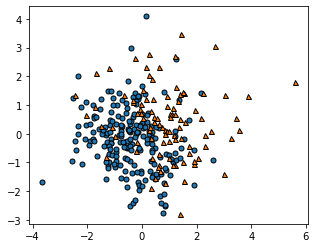

In [77]:
# 신점도 가시화
def Simple_Scatter(i, Name):
    Data = fd[list(fd.keys())[i]]
    G = sns.jointplot(x = 'X', y = 'Y', data = Data, kind='scatter', hue = "CLASS")
    G.fig.suptitle("Data : " + Name, fontsize = 10, color = 'black', alpha = 0.9)

# 데이터 그래프
fig, axes = plt.subplots(1,1,figsize=(5,4))
mglearn.discrete_scatter(fd.X, fd.Y, fd.DEATH_EVENT, s=5)


In [78]:
# k-means 클러스터링 함수 실행 후 차트 가시화
def k_Means_Plot(Data, Select_k, NAME, Init_Method = 'k-means++', Num_Init=10):
    Data2 = sklearn_result   
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    for i in Select_k:
        Kmeans_Clustering = KMeans(n_clusters=i, init=Init_Method, random_state=2020, n_init=Num_Init)
        Kmeans_Clustering.fit(Data2)
        mglearn.discrete_scatter(Data2.X, Data2.Y, Kmeans_Clustering.labels_, ax=axes[i-2], s=5)
        mglearn.discrete_scatter(Kmeans_Clustering.cluster_centers_[:, 0], 
                                 Kmeans_Clustering.cluster_centers_[:, 1],
                                 list(range(i)), 
                                 markeredgewidth=3, 
                                 ax=axes[i - 2], s=10)
        Score = np.round(silhouette_score(Data2, Kmeans_Clustering.labels_),2)
        axes[i - 2].set_title( NAME + ' / k = ' + str(i)+' / S_Score:'+str(Score))

C:\Users\SAMSSUNG\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SAMSSUNG\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SAMSSUNG\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


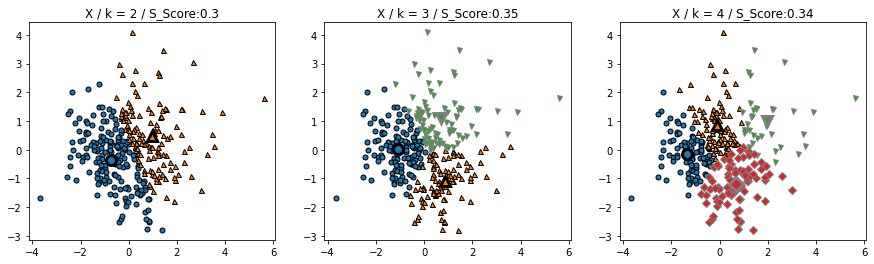

In [79]:
# Num_init = 1일때
k_Means_Plot(Data = fd[list(fd.keys())[i]],
                Select_k = range(2,5),
                NAME = list(fd.keys())[i],
                Init_Method='random',Num_Init=1)

C:\Users\SAMSSUNG\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SAMSSUNG\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SAMSSUNG\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


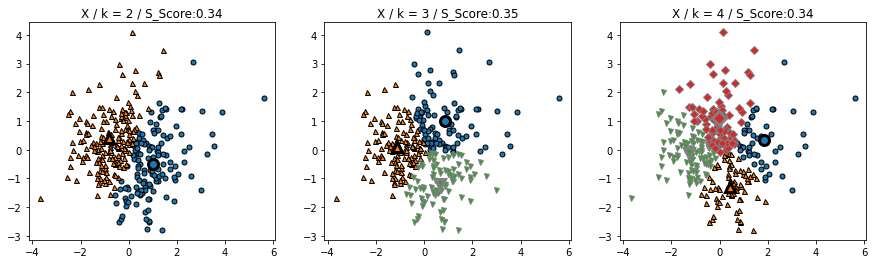

In [80]:
# Num_init = 10일때
k_Means_Plot(Data = fd[list(fd.keys())[i]],
                Select_k = range(2,5),
                NAME = list(fd.keys())[i],
                Init_Method='random',Num_Init=10)

C:\Users\SAMSSUNG\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SAMSSUNG\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SAMSSUNG\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


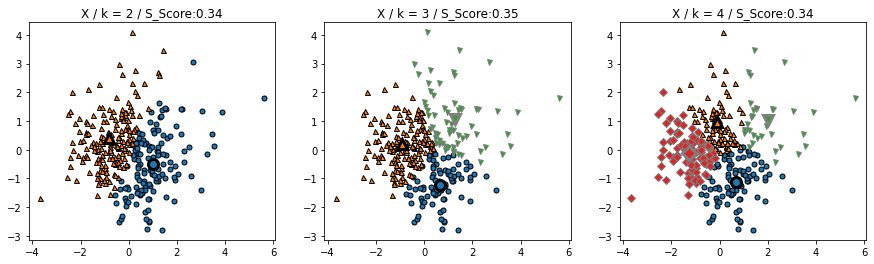

In [81]:
# K-means++ 사용하기
for i in range(0,1):
    #Simple_Scatter(i, list(fd.keys())[i])
    k_Means_Plot(Data = fd[list(fd.keys())[i]],
                 Select_k = range(2, 5),
                 NAME = list(fd.keys())[i],
                 Init_Method='k-means++',Num_Init=1)

In [82]:
# complete linkage에 대한 dendrogram 시각화
def Fixed_Dendrogram(Data, Num_of_p, Full_Use):
    Linkage_Matrix = linkage(Data,'complete')
    if(Full_Use == True):
        Num_of_p = np.shape(Data)[0]
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('sample index')
    else:
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    dendrogram(
        Linkage_Matrix,
        truncate_mode = 'lastp',  
        p = Num_of_p, 
        leaf_rotation = 90.,
        leaf_font_size = 12.,
        color_threshold = 'default'
    )
    plt.show()

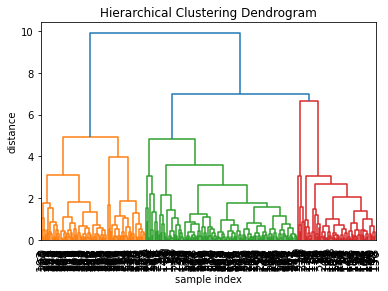

In [83]:
Fixed_Dendrogram(fd[['X','Y']], -1, True) # -1: nomeaningful value

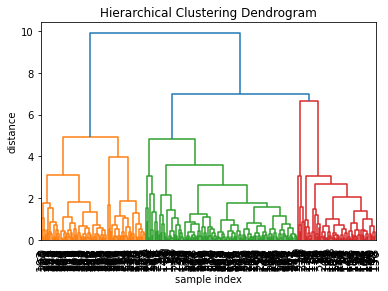

In [84]:
a = Fixed_Dendrogram(fd[['X','Y']], 10, True)

In [85]:
def Hclust_Plot(Data,Select_k,NAME):
    Data2 = fd[['X', 'Y']]    
    fig, axes = plt.subplots(1, 4, figsize=(15, 4))
    for i in Select_k:
        H_Clustering = AgglomerativeClustering(n_clusters=i,linkage="complete")
        P_Labels = H_Clustering.fit_predict(Data2)
        mglearn.discrete_scatter(Data2.X, Data2.Y, P_Labels, ax=axes[i - 2], s=5)        
        axes[i - 2].set_title("Data:" + NAME + ' / k = ' + str(i))
        Score=np.round(silhouette_score(Data2,P_Labels),3)
        axes[i - 2].set_title( NAME + ' / k = ' + str(i)+' / S_Score:'+str(Score))

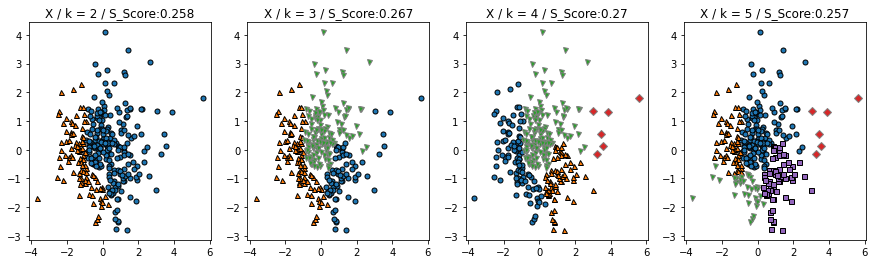

In [86]:
# HC의 예측결과 가시화

Hclust_Plot(fd[list(fd.keys())[0]],
            range(2, 6), list(fd.keys())[0])

In [87]:
def DBSCAN_Plot(Data,NAME,min_samples=10,eps=0.4):
    Data2 = fd[['X', 'Y']] 
    Append_k_Means_Results = list()
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    Set_DBSCAN_Hyperparameter=DBSCAN(min_samples=min_samples,eps=eps)
    Results = Set_DBSCAN_Hyperparameter.fit_predict(Data2)
    Score=np.round(silhouette_score(Data2,Results),3)
    mglearn.discrete_scatter(fd.X, fd.Y, fd.DEATH_EVENT, ax=axes[0], s=4)
    axes[0].set_title("Data:" + NAME + 'GroundTruth')    
    mglearn.discrete_scatter(fd.X, fd.Y, Results, ax=axes[1], s=4)
    axes[1].set_title("Data:" + NAME + ' DBSCAN/ eps:'+str(eps)+' / min_sample:'+str(min_samples)+'/ S_score:'+str(Score))
    

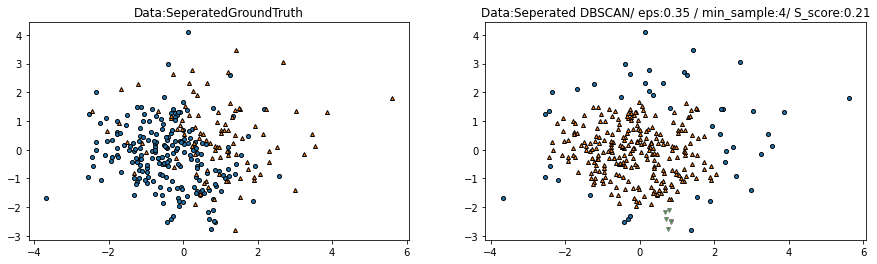

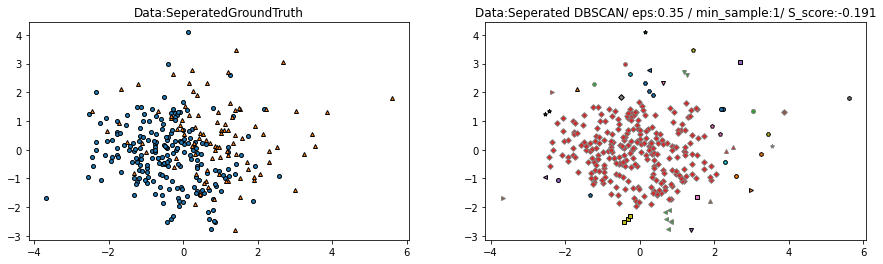

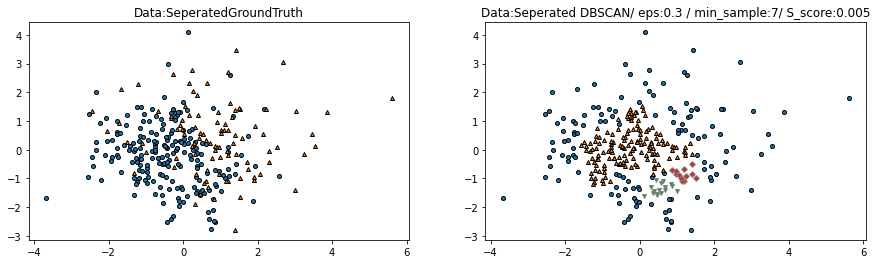

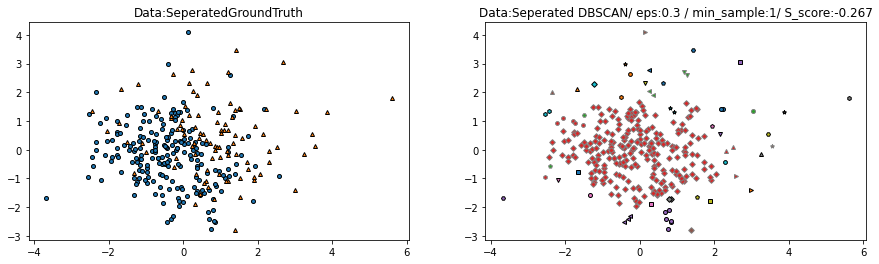

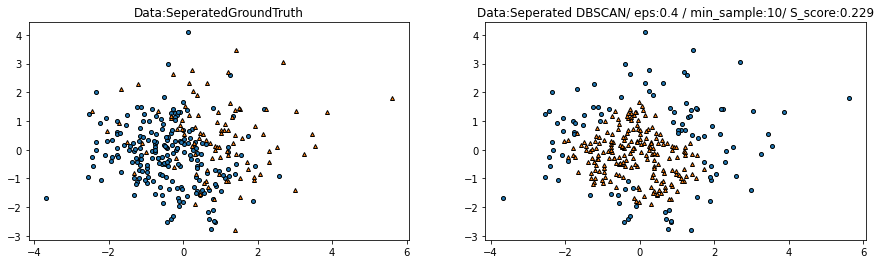

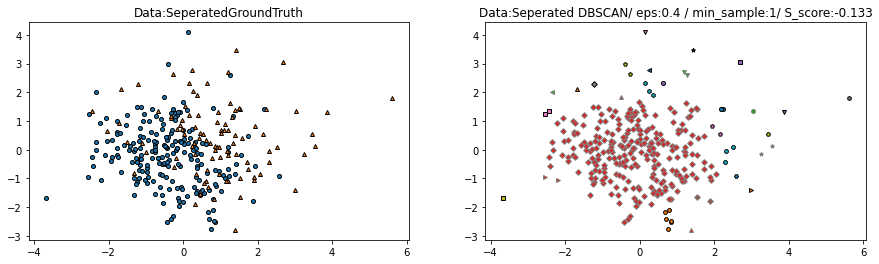

In [88]:
DBSCAN_Plot(Data=fd,NAME="Seperated",min_samples=4,eps=0.35)
DBSCAN_Plot(Data=fd,NAME="Seperated",min_samples=1,eps=0.35)
DBSCAN_Plot(Data=fd,NAME="Seperated",min_samples=7,eps=0.30)
DBSCAN_Plot(Data=fd,NAME="Seperated",min_samples=1,eps=0.30)
DBSCAN_Plot(Data=fd,NAME="Seperated",min_samples=10,eps=0.40)
DBSCAN_Plot(Data=fd,NAME="Seperated",min_samples=1,eps=0.40)

In [89]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import RobustScaler

In [90]:
centers = [[0.8, 0.95], [-0.95, -0.8], [1, -.95], [-.98, 1], [-.5,1],
        [-.2,-.1], [.95,-.2], [-.2,-.9], [-.08,.7]]
X, labels_true = make_blobs(n_samples=850, centers=centers,
                            cluster_std=0.16, random_state=2020)
X = RobustScaler().fit_transform(X)

Hyperparameters: [ e: 0.03 , n: 10 ]
V-measure: 0.054
Silhouette score: -0.199


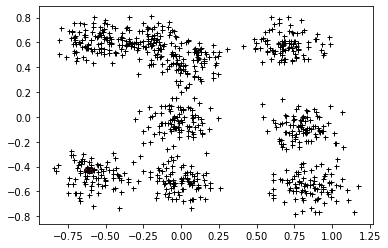

Hyperparameters: [ e: 0.06 , n: 10 ]
V-measure: 0.624
Silhouette score: 0.131


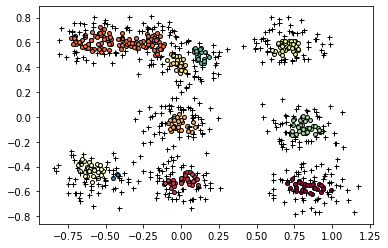

Hyperparameters: [ e: 0.09 , n: 10 ]
V-measure: 0.821
Silhouette score: 0.509


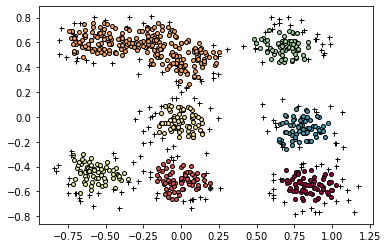

Hyperparameters: [ e: 0.12 , n: 10 ]
V-measure: 0.762
Silhouette score: 0.507


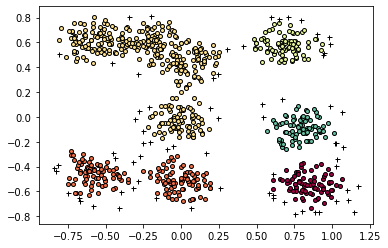

Hyperparameters: [ e: 0.15 , n: 10 ]
V-measure: 0.389
Silhouette score: 0.389


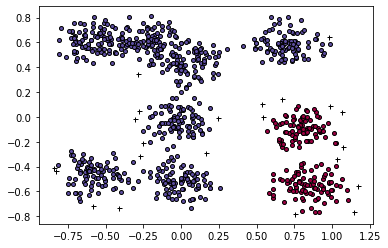

Hyperparameters: [ e: 0.18 , n: 10 ]
V-measure: 0.389
Silhouette score: 0.389


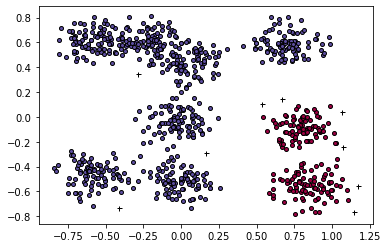

In [91]:
for i in range(1,7):
    
    # DBSCAN 하이퍼 파라미터 설정
    epsilon = round(i * 0.03, 2)
    no_of_sample = 10

    print("Hyperparameters: [ e:", epsilon , ", n:",no_of_sample, "]")

    try:
        db = DBSCAN(eps = epsilon, min_samples = no_of_sample).fit(X)
        core_mask = np.zeros_like(db.labels_, dtype = bool)
        core_mask[db.core_sample_indices_] = True
        labels = db.labels_

        print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
        print("Silhouette score: %0.3f" % metrics.silhouette_score(X, labels))
    except:
        pass
        
    unique_labels = set(labels) # 유일 label 추출
    colors = [plt.cm.Spectral(each) # 각 label 별 색 추출
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors): # index, 색정보 반복
        if k == -1:
            col = [0, 0, 0, 1] # black
        class_member_mask = (labels == k)

        # Core sample 표시
        xy = X[class_member_mask & core_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=4)

        # Noise sample 표시
        xy = X[class_member_mask & ~core_mask]
        plt.plot(xy[:, 0], xy[:, 1], '+', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)
    plt.show()

Hyperparameters: [ e: 0.09 , n: 2 ]
V-measure: 0.605
Silhouette score: 0.109


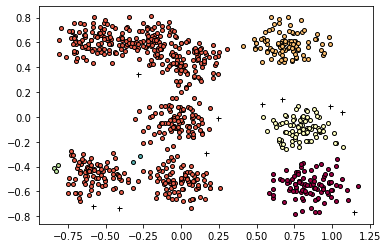

Hyperparameters: [ e: 0.09 , n: 3 ]
V-measure: 0.605
Silhouette score: 0.225


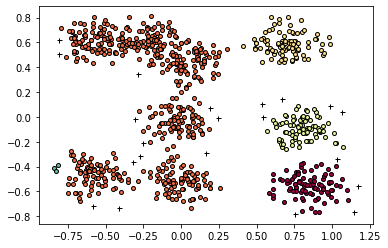

Hyperparameters: [ e: 0.09 , n: 4 ]
V-measure: 0.603
Silhouette score: 0.304


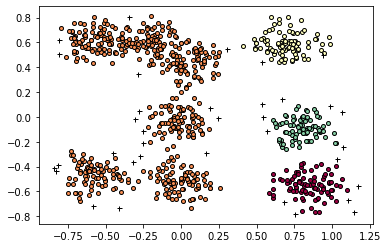

Hyperparameters: [ e: 0.09 , n: 5 ]
V-measure: 0.604
Silhouette score: 0.306


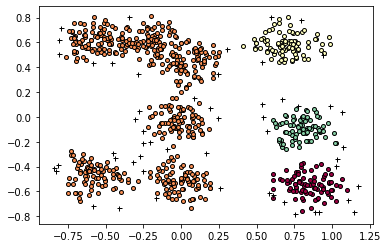

Hyperparameters: [ e: 0.09 , n: 6 ]
V-measure: 0.739
Silhouette score: 0.484


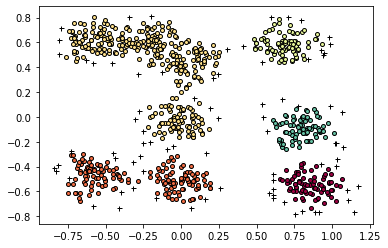

Hyperparameters: [ e: 0.09 , n: 7 ]
V-measure: 0.778
Silhouette score: 0.487


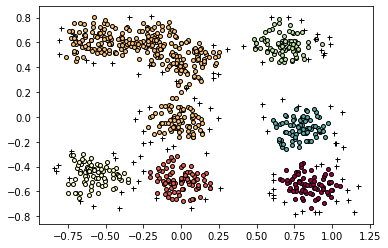

Hyperparameters: [ e: 0.09 , n: 8 ]
V-measure: 0.839
Silhouette score: 0.495


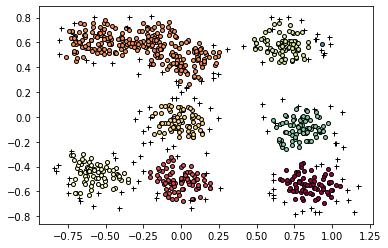

Hyperparameters: [ e: 0.09 , n: 9 ]
V-measure: 0.830
Silhouette score: 0.523


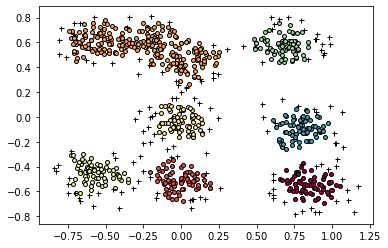

Hyperparameters: [ e: 0.09 , n: 10 ]
V-measure: 0.821
Silhouette score: 0.509


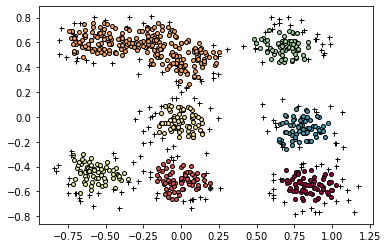

In [92]:
for i in range(1,10):
    
    # DBSCAN 하이퍼 파라미터 설정
    epsilon = 0.09
    no_of_sample = 1 + 1 * i

    print("Hyperparameters: [ e:", epsilon , ", n:",no_of_sample, "]")

    try:
        db = DBSCAN(eps = epsilon, min_samples = no_of_sample).fit(X)
        core_mask = np.zeros_like(db.labels_, dtype = bool)
        core_mask[db.core_sample_indices_] = True
        labels = db.labels_

        print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
        print("Silhouette score: %0.3f" % metrics.silhouette_score(X, labels))
    except:
        pass
        
    unique_labels = set(labels) # 유일 label 추출
    colors = [plt.cm.Spectral(each) # 각 label 별 색 추출
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors): # index, 색정보 반복
        if k == -1:
            col = [0, 0, 0, 1] # black
        class_member_mask = (labels == k)

        # Core sample 표시
        xy = X[class_member_mask & core_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=4)

        # Noise sample 표시
        xy = X[class_member_mask & ~core_mask]
        plt.plot(xy[:, 0], xy[:, 1], '+', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)
    plt.show()

Text(0.5, 1.0, 'label coloring')

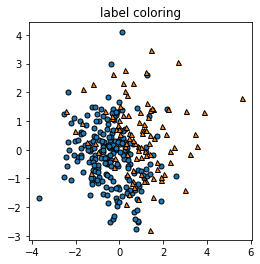

In [93]:
#label_col : 전처리과정에서 제거한 레이블 복사해뒀던거

princ = np.c_[sklearn_result, D]
D = 2 #label = 2 (True or False)
fig, axes = plt.subplots(1,1,figsize=(4,4))
mglearn.discrete_scatter(princ[:,0], princ[:,1], princ[:,2], ax=axes, s=5)
axes.set_title("label coloring")